In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv


In [2]:
import tensorflow as tf
from skimage.transform import rescale
import matplotlib.pyplot as plt
import cv2

In [3]:
df = pd.read_csv("../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")

In [4]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


**Create age groups**

In [5]:
bins= [0,6,13,19,26,36,46,56,66,76,130]
labels = ['0-5','6-12','13-18','19-25','26-35','36-45','46-55','56-65','66-75','76+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

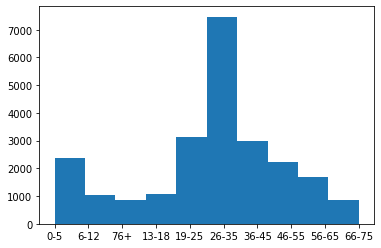

In [6]:
plt.hist(df['AgeGroup'])
plt.show()

In [7]:
print(df[df['AgeGroup']=="19-25"].describe())

print(df[df['AgeGroup']=="36-45"].describe())

               age    ethnicity       gender
count  3142.000000  3142.000000  3142.000000
mean     22.998727     1.679504     0.654679
std       1.757143     1.377984     0.475549
min      19.000000     0.000000     0.000000
25%      22.000000     0.000000     0.000000
50%      24.000000     2.000000     1.000000
75%      24.000000     3.000000     1.000000
max      25.000000     4.000000     1.000000
               age    ethnicity       gender
count  2987.000000  2987.000000  2987.000000
mean     40.003013     1.161701     0.367928
std       3.014753     1.308801     0.482322
min      36.000000     0.000000     0.000000
25%      37.000000     0.000000     0.000000
50%      40.000000     1.000000     0.000000
75%      42.000000     2.000000     1.000000
max      45.000000     4.000000     1.000000


In [8]:
df['AgeGroup'].value_counts()

26-35    7470
19-25    3142
36-45    2987
0-5      2363
46-55    2237
56-65    1675
13-18    1082
6-12     1050
76+       851
66-75     848
Name: AgeGroup, dtype: int64

**Images in dataset are only 48 by 48, lets rescale them to larger size**

save pixels as features and AgeGroup as target variable

In [9]:
features = ["pixels"]
target_age = ["AgeGroup"]

Split data to keep 15% for validation after model is trained and extract pixels and save them as x2, then use train test split.

In [10]:
from sklearn.model_selection import train_test_split

x = np.zeros((df.shape[0], 48**2))

for i in range(len(x)):
    x[i,:] = df[features].loc[i][0].split()

x1 = x.reshape(df.shape[0], -48, 48, 1)

x2 = np.zeros((df.shape[0], 100, 100, 1))

for i in range(len(x1)):
    x2[i] = cv2.resize(x1[i],(100,100),interpolation=cv2.INTER_LINEAR).reshape(100,100,1)

y= df[target_age]

x_train, x_val, y_train, y_val = train_test_split(x2 / 255.0, y, random_state=42, test_size=0.15)

In [11]:
y_val

,AgeGroup
17814,46-55
15080,36-45
22829,6-12
16074,36-45
8972,26-35
...,...
6669,26-35
3699,19-25
5043,19-25
17120,36-45


Example of images and their labels

(100, 100, 1)
Age:  36-45


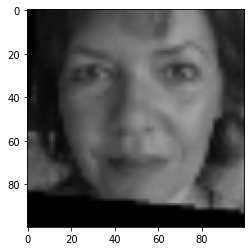

(100, 100, 1)
Age:  36-45


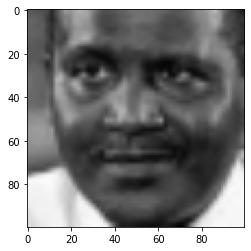

(100, 100, 1)
Age:  26-35


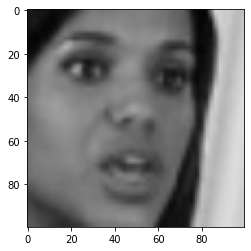

(100, 100, 1)
Age:  36-45


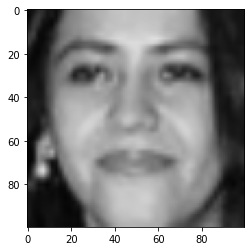

(100, 100, 1)
Age:  36-45


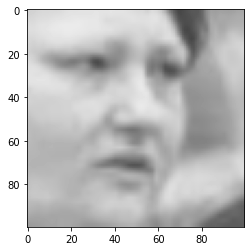

In [12]:
import matplotlib.image as img

for j in [0, 10, 300, 52, 445]:
    arr = np.asarray(np.array(x_train[j]))
    print(arr.shape)
    print("Age: ",  y_train["AgeGroup"].iloc[j])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
    plt.show()

**Build Model**

In [13]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7),input_shape=(100, 100, 1),activation='relu'))
#model.add(Conv2D(48, kernel_size=(3,3),activation='relu'))#,padding='same'
#model.add(Conv2D(64, kernel_size=(5,5),activation='relu'))
model.add(Conv2D(32, kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(128, activation="relu", input_shape=(48, 48, 1)))
#model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
#model.add(Dense(48, activation="relu"))
#model.add(Dense(64, activation="relu"))
#model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))


model.add(Dense(10, activation="softmax"))
#model.add(Dense(117, activation="softmax"))

model.summary()

2022-08-13 13:25:49.052917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 13:25:49.170318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 13:25:49.171133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        1600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 59168)             0         
_________________________________________________________________
dropout (Dropout)            (None, 59168)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

2022-08-13 13:25:49.173242: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-13 13:25:49.173630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 13:25:49.174883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 13:25:49.175975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= opt, metrics=["accuracy"])

In [16]:
from keras.callbacks import ModelCheckpoint
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
mcp_save = ModelCheckpoint('age_predictor.h5', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(x=x_train, y=pd.get_dummies(y_train["AgeGroup"]), batch_size=24, validation_split=0.2,epochs=30, callbacks=[callback, mcp_save])

2022-08-13 13:25:52.641284: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644760000 exceeds 10% of free system memory.
2022-08-13 13:25:53.402837: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644760000 exceeds 10% of free system memory.
2022-08-13 13:25:53.944539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-08-13 13:25:55.460852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


672/672 [==============================] - 16s 12ms/step - loss: 1.8879 - accuracy: 0.3516 - val_loss: 1.6397 - val_accuracy: 0.3883
Epoch 2/30
672/672 [==============================] - 8s 11ms/step - loss: 1.6130 - accuracy: 0.4002 - val_loss: 1.4736 - val_accuracy: 0.4181
Epoch 3/30
672/672 [==============================] - 8s 11ms/step - loss: 1.5089 - accuracy: 0.4234 - val_loss: 1.4185 - val_accuracy: 0.4444
Epoch 4/30
672/672 [==============================] - 8s 12ms/step - loss: 1.4449 - accuracy: 0.4396 - val_loss: 1.3550 - val_accuracy: 0.4658
Epoch 5/30
672/672 [==============================] - 8s 11ms/step - loss: 1.4016 - accuracy: 0.4428 - val_loss: 1.3244 - val_accuracy: 0.4772
Epoch 6/30
672/672 [==============================] - 8s 11ms/step - loss: 1.3564 - accuracy: 0.4552 - val_loss: 1.3691 - val_accuracy: 0.4722
Epoch 7/30
672/672 [==============================] - 8s 11ms/step - loss: 1.3197 - accuracy: 0.4650 - val_loss: 1.3013 - val_accuracy: 0.4742
Epoch 8/3

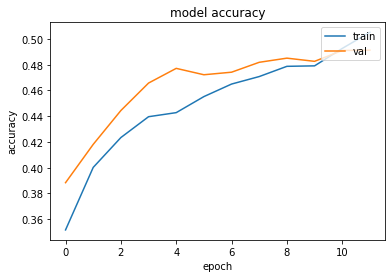

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Load best model

In [18]:
model.load_weights("./age_predictor.h5")

In [19]:
model.evaluate(x_val, pd.get_dummies(y_val["AgeGroup"]))

112/112 [==============================] - 1s 6ms/step - loss: 1.2773 - accuracy: 0.4885


[1.2772502899169922, 0.488470196723938]

Example predictions

(100, 100, 1)
Age:  46-55
Predicted:  26-35


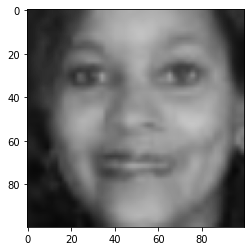

(100, 100, 1)
Age:  26-35
Predicted:  26-35


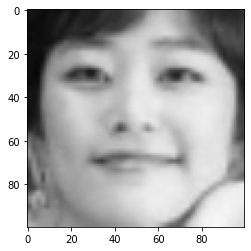

(100, 100, 1)
Age:  56-65
Predicted:  56-65


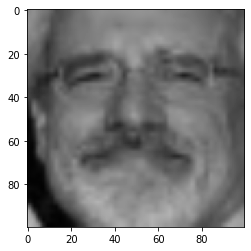

(100, 100, 1)
Age:  19-25
Predicted:  26-35


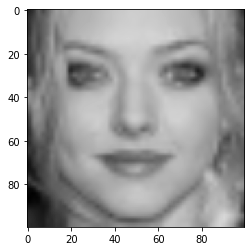

(100, 100, 1)
Age:  26-35
Predicted:  26-35


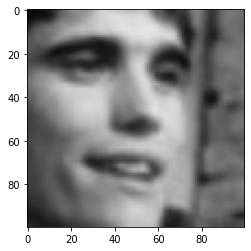

(100, 100, 1)
Age:  0-5
Predicted:  0-5


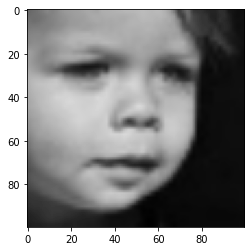

(100, 100, 1)
Age:  56-65
Predicted:  56-65


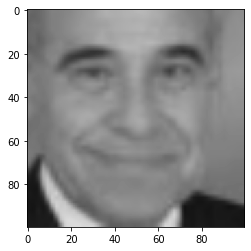

(100, 100, 1)
Age:  66-75
Predicted:  56-65


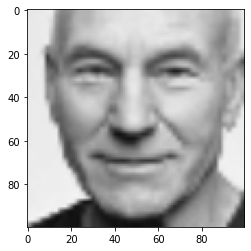

(100, 100, 1)
Age:  36-45
Predicted:  26-35


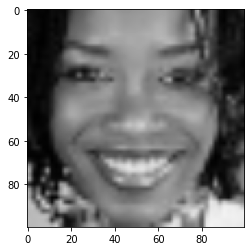

In [20]:
ll = [0, 10, 300, 56, 444, 1300, 1999, 2008, 2100]

#pred = np.zeros(len(ll))

pred = model.predict(x_val[ll])

counter = 0
for j in ll:
    arr = np.asarray(np.array(x_val[j]))
    print(arr.shape)
    print("Age: ",  y_val["AgeGroup"].iloc[j])
    print("Predicted: ", labels[pred[counter].argmax()])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
    plt.show()
    counter = counter + 1

Most of the examples are either labeled corectly or the category is close to the correct label

**Sex prediction**

In [21]:
df["gender"]

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [22]:
gen_train, gen_val = train_test_split(df["gender"], random_state=42, test_size=0.15)

In [23]:
#model.add(Dense(64, input_shape=(2304,)))

modelgen = Sequential()
modelgen.add(Conv2D(32, kernel_size=(7,7),input_shape=(100, 100, 1),activation='relu'))
modelgen.add(Conv2D(32, kernel_size=(5,5),activation='relu'))#,padding='same'
modelgen.add(MaxPooling2D(pool_size=(2,2)))
modelgen.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
modelgen.add(Flatten())
modelgen.add(Dropout(0.5))
#model.add(Dense(128, activation="relu", input_shape=(48, 48, 1)))
#model.add(Dense(128, activation="relu"))
modelgen.add(Dense(32, activation="relu"))
#model.add(Dense(128, activation="relu"))
modelgen.add(Dropout(0.25))


modelgen.add(Dense(1, activation="sigmoid"))
#model.add(Dense(117, activation="softmax"))

modelgen.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        1600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 43, 43, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 59168)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 59168)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelgen.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])

In [25]:
history2 = modelgen.fit(x_train, gen_train, validation_split=0.2, batch_size=48, epochs=12)

2022-08-13 13:28:22.748607: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644760000 exceeds 10% of free system memory.
2022-08-13 13:28:23.472635: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644760000 exceeds 10% of free system memory.


Epoch 1/12
336/336 [==============================] - 7s 19ms/step - loss: 0.4134 - accuracy: 0.8030 - val_loss: 0.3209 - val_accuracy: 0.8615
Epoch 2/12
336/336 [==============================] - 6s 16ms/step - loss: 0.3265 - accuracy: 0.8535 - val_loss: 0.2900 - val_accuracy: 0.8722
Epoch 3/12
336/336 [==============================] - 6s 17ms/step - loss: 0.2920 - accuracy: 0.8731 - val_loss: 0.2854 - val_accuracy: 0.8767
Epoch 4/12
336/336 [==============================] - 6s 17ms/step - loss: 0.2663 - accuracy: 0.8821 - val_loss: 0.2708 - val_accuracy: 0.8861
Epoch 5/12
336/336 [==============================] - 6s 17ms/step - loss: 0.2487 - accuracy: 0.8921 - val_loss: 0.2717 - val_accuracy: 0.8866
Epoch 6/12
336/336 [==============================] - 6s 16ms/step - loss: 0.2241 - accuracy: 0.9022 - val_loss: 0.2639 - val_accuracy: 0.8911
Epoch 7/12
336/336 [==============================] - 6s 17ms/step - loss: 0.2122 - accuracy: 0.9095 - val_loss: 0.2681 - val_accuracy: 0.8792

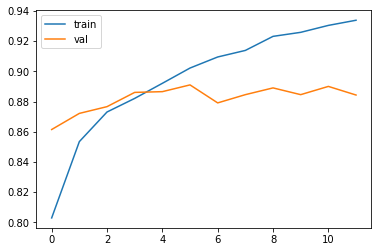

In [26]:
plt.plot(history2.history["accuracy"], label="train")
plt.plot(history2.history["val_accuracy"], label="val")
plt.legend()
plt.show()

In [27]:
modelgen.evaluate(x_val, gen_val)

112/112 [==============================] - 1s 5ms/step - loss: 0.3315 - accuracy: 0.8791


[0.3315425515174866, 0.8790776133537292]

Example predictions

(100, 100, 1)
Sex:  1
Predicted:  [0.9978908]


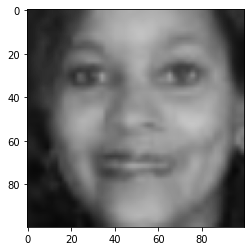

(100, 100, 1)
Sex:  1
Predicted:  [0.9982418]


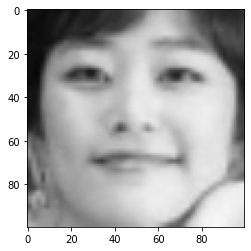

(100, 100, 1)
Sex:  0
Predicted:  [2.5654534e-05]


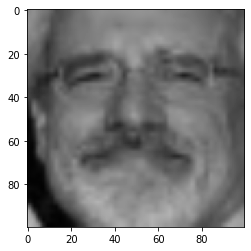

(100, 100, 1)
Sex:  1
Predicted:  [0.9998412]


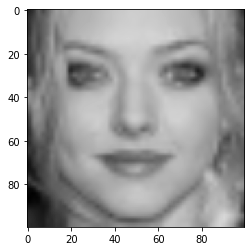

(100, 100, 1)
Sex:  0
Predicted:  [0.10050142]


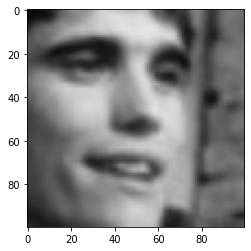

(100, 100, 1)
Sex:  0
Predicted:  [0.07288706]


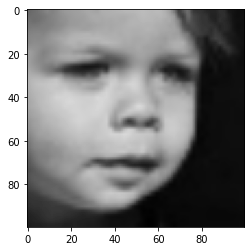

(100, 100, 1)
Sex:  0
Predicted:  [7.265844e-08]


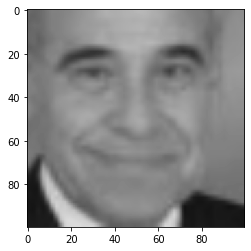

(100, 100, 1)
Sex:  0
Predicted:  [1.351606e-09]


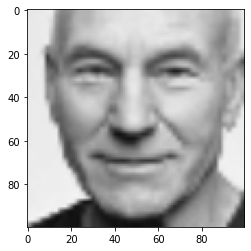

(100, 100, 1)
Sex:  1
Predicted:  [0.99996793]


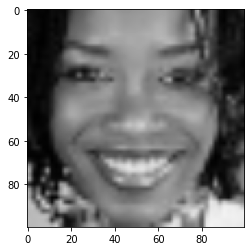

In [28]:
ll = [0, 10, 300, 56, 444, 1300, 1999, 2008, 2100]

#pred = np.zeros(len(ll))

pred = modelgen.predict(x_val[ll])

counter = 0
for j in ll:
    arr = np.asarray(np.array(x_val[j]))
    print(arr.shape)
    print("Sex: ",  gen_val.iloc[j])
    print("Predicted: ", pred[counter])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
    plt.show()
    counter = counter + 1

In [29]:
modelgen.save("gen_predictor.h5")